In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
data.data.shape

(569, 30)

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [18]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [19]:
n_epochs= 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
    optimizer.zero_grad()

    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    loss.backward()
    optimizer.step()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = test_loss.item()

    if (it + 1) % 50 == 0:
        print(f'Epoch {it+1} | Train Loss {loss.item():.4f} | Test Loss {test_loss.item():.4f}')

Epoch 50 | Train Loss 0.4340 | Test Loss 0.4488
Epoch 100 | Train Loss 0.3244 | Test Loss 0.3413
Epoch 150 | Train Loss 0.2614 | Test Loss 0.2811
Epoch 200 | Train Loss 0.2208 | Test Loss 0.2425
Epoch 250 | Train Loss 0.1928 | Test Loss 0.2157
Epoch 300 | Train Loss 0.1727 | Test Loss 0.1962
Epoch 350 | Train Loss 0.1575 | Test Loss 0.1815
Epoch 400 | Train Loss 0.1456 | Test Loss 0.1701
Epoch 450 | Train Loss 0.1360 | Test Loss 0.1610
Epoch 500 | Train Loss 0.1282 | Test Loss 0.1535
Epoch 550 | Train Loss 0.1215 | Test Loss 0.1472
Epoch 600 | Train Loss 0.1159 | Test Loss 0.1419
Epoch 650 | Train Loss 0.1110 | Test Loss 0.1374
Epoch 700 | Train Loss 0.1068 | Test Loss 0.1334
Epoch 750 | Train Loss 0.1030 | Test Loss 0.1299
Epoch 800 | Train Loss 0.0997 | Test Loss 0.1268
Epoch 850 | Train Loss 0.0967 | Test Loss 0.1240
Epoch 900 | Train Loss 0.0940 | Test Loss 0.1215
Epoch 950 | Train Loss 0.0916 | Test Loss 0.1192
Epoch 1000 | Train Loss 0.0893 | Test Loss 0.1172


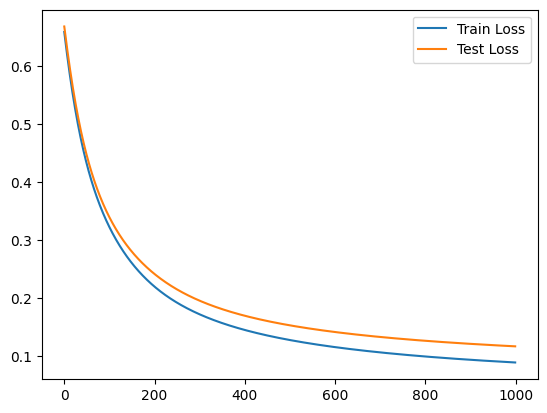

In [20]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [21]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  p_test = model(X_test)
  p_test = np.round(p_test.numpy())

  train_acc = (p_train.round() == y_train).float().mean()
  test_acc = (p_test.round() == y_test).float().mean()

  print(f'Train Accuracy: {train_acc.item():.4f}')
  print(f'Test Accuracy: {test_acc.item():.4f}')

Train Accuracy: 0.9843
Test Accuracy: 0.9521
